# Побудова рекурентної нейромережі за допомогою Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [21]:
max_words = 10000  # кількість слів, що розглядаються як особливості
max_len = 300  # обмеження кількості слів в тексті
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [22]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

## Побудова моделі RNN

In [23]:
model = Sequential()
model.add(Embedding(max_words, 32))
# Embedding шар для перетворення у фектори фікс. довжини
model.add(SimpleRNN(64))
# SimpleRNN шар з 64 вузлами
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 326273 (1.24 MB)
Trainable params: 326273 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [26]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 20s 140ms/step - loss: 0.6643 - accuracy: 0.5858 - val_loss: 0.5740 - val_accuracy: 0.7200
Epoch 2/5
137/137 [==============================] - 17s 122ms/step - loss: 0.4655 - accuracy: 0.7923 - val_loss: 0.4243 - val_accuracy: 0.8193
Epoch 3/5
137/137 [==============================] - 17s 127ms/step - loss: 0.3307 - accuracy: 0.8629 - val_loss: 0.3935 - val_accuracy: 0.8283
Epoch 4/5
137/137 [==============================] - 19s 142ms/step - loss: 0.2874 - accuracy: 0.8873 - val_loss: 0.5466 - val_accuracy: 0.8057
Epoch 5/5
137/137 [==============================] - 18s 132ms/step - loss: 0.2249 - accuracy: 0.9120 - val_loss: 0.4003 - val_accuracy: 0.8329


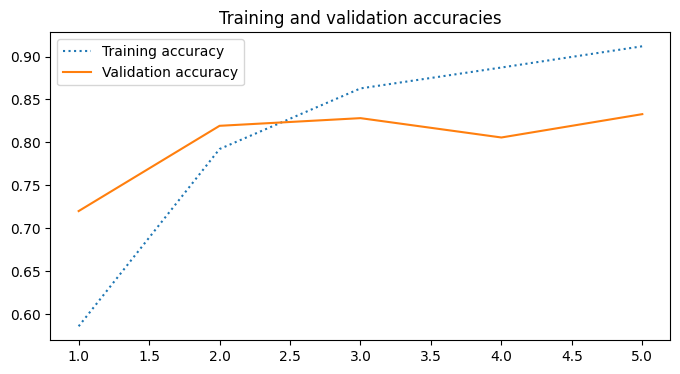

In [27]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"], ":", label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")

plt.title("Training and validation accuracies")
plt.legend()

plt.show()

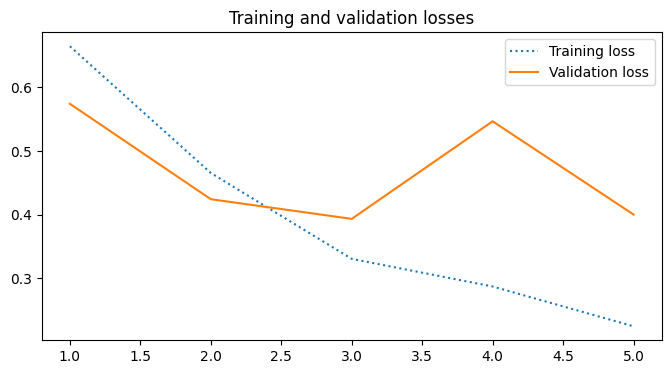

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"], ":", label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")

plt.title("Training and validation losses")
plt.legend()

plt.show()

### Прогнозування

In [29]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 18s 23ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### Оцінка

In [30]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

782/782 [==============================] - 18s 22ms/step - loss: 0.2188 - accuracy: 0.9208
Відсоток точності тестових даних:  83.47
Відсоток точності навчальних даних:  92.08


## Пбудова моделі LSTM

In [31]:
from keras.layers import LSTM


model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation="sigmoid"))

In [32]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model_lstm.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [34]:
history_lstm = model_lstm.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 36s 248ms/step - loss: 0.6043 - accuracy: 0.6730 - val_loss: 0.4928 - val_accuracy: 0.8055
Epoch 2/5
137/137 [==============================] - 29s 214ms/step - loss: 0.3625 - accuracy: 0.8518 - val_loss: 0.4003 - val_accuracy: 0.8260
Epoch 3/5
137/137 [==============================] - 32s 231ms/step - loss: 0.2750 - accuracy: 0.8933 - val_loss: 0.3875 - val_accuracy: 0.8375
Epoch 4/5
137/137 [==============================] - 29s 215ms/step - loss: 0.2295 - accuracy: 0.9143 - val_loss: 0.2929 - val_accuracy: 0.8819
Epoch 5/5
137/137 [==============================] - 29s 216ms/step - loss: 0.1965 - accuracy: 0.9278 - val_loss: 0.2954 - val_accuracy: 0.8803


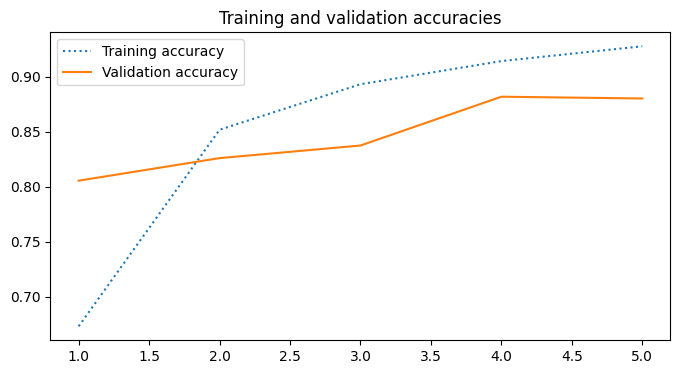

In [35]:
epochs = range(1, len(history_lstm.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history_lstm.history["accuracy"], ":", label="Training accuracy")
plt.plot(epochs, history_lstm.history["val_accuracy"], label="Validation accuracy")

plt.title("Training and validation accuracies")
plt.legend()

plt.show()

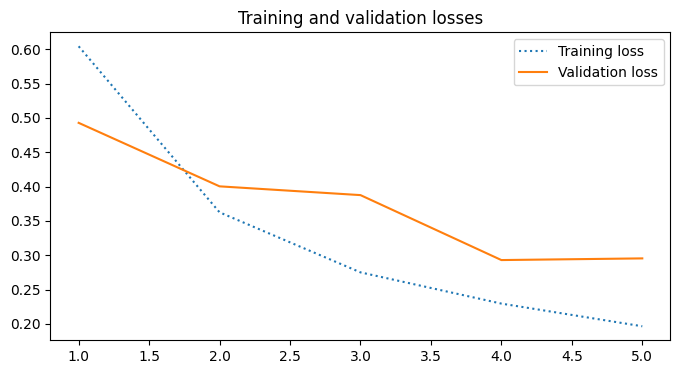

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, history_lstm.history["loss"], ":", label="Training loss")
plt.plot(epochs, history_lstm.history["val_loss"], label="Validation loss")

plt.title("Training and validation losses")
plt.legend()

plt.show()

### Прогнозування

In [37]:
predictions_lstm = model_lstm.predict(x_test)

binary_predictions_lstm = [1 if pred > 0.5 else 0 for pred in predictions_lstm]
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_lstm[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 27s 34ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### Оцінка

In [38]:
result_test = model_lstm.evaluate(x_test, y_test)
result_train = model_lstm.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

782/782 [==============================] - 24s 31ms/step - loss: 0.1921 - accuracy: 0.9315
Відсоток точності тестових даних:  87.32
Відсоток точності навчальних даних:  93.15


## Побудова моделі Двосторонньої мережі (BRNN)

In [40]:
from keras.layers import Bidirectional


model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_words, 32))
model_bidirectional.add(Bidirectional(LSTM(32)))
model_bidirectional.add(Dense(1, activation="sigmoid"))

In [41]:
model_bidirectional.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model_bidirectional.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [43]:
history_bidirectional = model_bidirectional.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 58s 393ms/step - loss: 0.6449 - accuracy: 0.6130 - val_loss: 0.4895 - val_accuracy: 0.8097
Epoch 2/5
137/137 [==============================] - 53s 389ms/step - loss: 0.3983 - accuracy: 0.8342 - val_loss: 0.3374 - val_accuracy: 0.8612
Epoch 3/5
137/137 [==============================] - 51s 376ms/step - loss: 0.2886 - accuracy: 0.8852 - val_loss: 0.3023 - val_accuracy: 0.8775
Epoch 4/5
137/137 [==============================] - 53s 385ms/step - loss: 0.2447 - accuracy: 0.9075 - val_loss: 0.2903 - val_accuracy: 0.8768
Epoch 5/5
137/137 [==============================] - 52s 379ms/step - loss: 0.2095 - accuracy: 0.9234 - val_loss: 0.3051 - val_accuracy: 0.8741


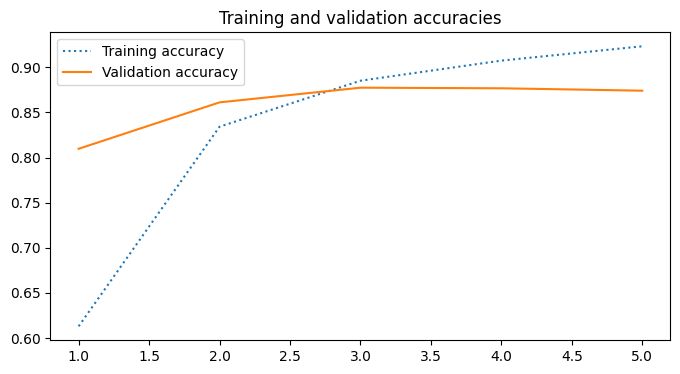

In [44]:
epochs = range(1, len(history_bidirectional.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history_bidirectional.history["accuracy"], ":", label="Training accuracy")
plt.plot(epochs, history_bidirectional.history["val_accuracy"], label="Validation accuracy")

plt.title("Training and validation accuracies")
plt.legend()

plt.show()

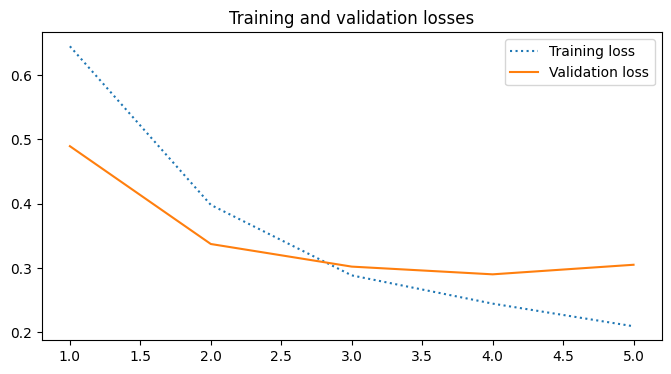

In [45]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, history_bidirectional.history["loss"], ":", label="Training loss")
plt.plot(epochs, history_bidirectional.history["val_loss"], label="Validation loss")

plt.title("Training and validation losses")
plt.legend()

plt.show()

### Прогнозування

In [46]:
predictions_bidirectional = model_bidirectional.predict(x_test)

binary_predictions_bidirectional = [1 if pred > 0.5 else 0 for pred in predictions_bidirectional]
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_bidirectional[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 38s 48ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### Оцінка

In [47]:
result_test = model_bidirectional.evaluate(x_test, y_test)
result_train = model_bidirectional.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

782/782 [==============================] - 40s 52ms/step - loss: 0.2144 - accuracy: 0.9216
Відсоток точності тестових даних:  86.66
Відсоток точності навчальних даних:  92.16


## Побудова моделі Глибокої мережі (DRNN)

In [48]:
model_deep = Sequential()
model_deep.add(Embedding(max_words, 32))
model_deep.add(LSTM(64, return_sequences=True))
model_deep.add(LSTM(32))
model_deep.add(Dense(1, activation="sigmoid"))

In [49]:
model_deep.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          24832     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 357281 (1.36 MB)
Trainable params: 357281 (1.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model_deep.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [51]:
history_deep = model_deep.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 121s 860ms/step - loss: 0.5959 - accuracy: 0.6529 - val_loss: 0.4172 - val_accuracy: 0.8135
Epoch 2/5
137/137 [==============================] - 123s 896ms/step - loss: 0.3639 - accuracy: 0.8462 - val_loss: 0.4626 - val_accuracy: 0.7861
Epoch 3/5
137/137 [==============================] - 134s 979ms/step - loss: 0.2786 - accuracy: 0.8911 - val_loss: 0.4176 - val_accuracy: 0.8047
Epoch 4/5
137/137 [==============================] - 117s 853ms/step - loss: 0.2289 - accuracy: 0.9151 - val_loss: 0.3097 - val_accuracy: 0.8713
Epoch 5/5
137/137 [==============================] - 109s 800ms/step - loss: 0.2085 - accuracy: 0.9221 - val_loss: 0.3269 - val_accuracy: 0.8661


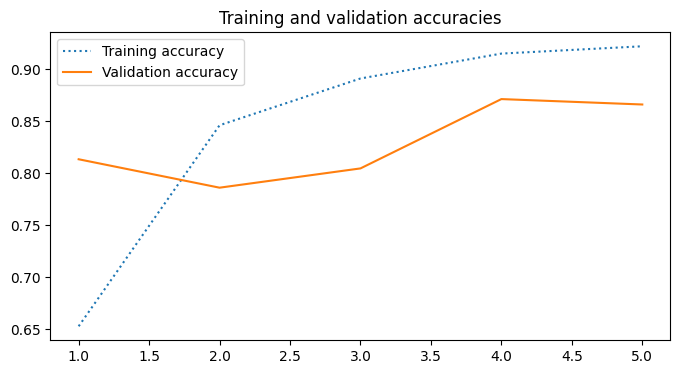

In [52]:
epochs = range(1, len(history_deep.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history_deep.history["accuracy"], ":", label="Training accuracy")
plt.plot(epochs, history_deep.history["val_accuracy"], label="Validation accuracy")

plt.title("Training and validation accuracies")
plt.legend()

plt.show()

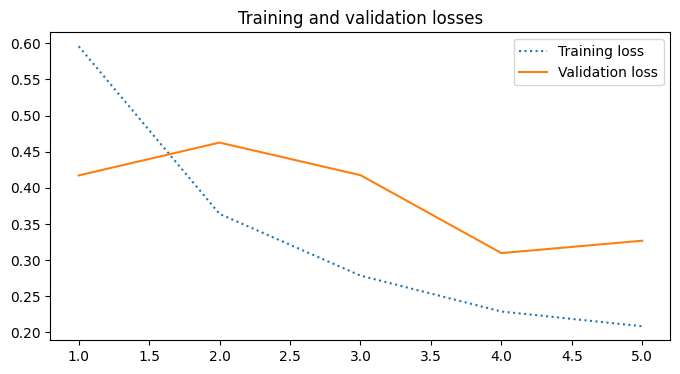

In [53]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, history_deep.history["loss"], ":", label="Training loss")
plt.plot(epochs, history_deep.history["val_loss"], label="Validation loss")

plt.title("Training and validation losses")
plt.legend()

plt.show()

### Прогнозування

In [54]:
predictions_deep = model_deep.predict(x_test)

binary_predictions_deep = [1 if pred > 0.5 else 0 for pred in predictions_deep]
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_deep[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 58s 73ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### Оцінка

In [55]:
result_test = model_deep.evaluate(x_test, y_test)
result_train = model_deep.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

782/782 [==============================] - 58s 74ms/step - loss: 0.2170 - accuracy: 0.9202
Відсоток точності тестових даних:  85.54
Відсоток точності навчальних даних:  92.02


### Висновок

Моделі **LSTM**, **BRNN**, **DRNN** показують кращі результати за  **просту RNN**.

Також значення точності **RNN** в даному випадку є вищими за умови, що `SimpleRNN` шар буде з більшою кількістю вузлів.

Якщо порівнювати графіки **LSTM** і **BRNN**, то можна побачити, що зі збільшенням епох *training and test accuracies* будуть більше розходитися, в той час як показники **LSTM** намагаються бути на однаковій більш менш невеликій відстані.

Загалом, у всіх моделях показники задовільні та близькі між одним. **BRNN** і **DRNN** виконуються довше за інші моделі.